In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import acquire as aq

Exercises

The end result of this exercise should be a file named prepare.py.

Using your store items data:

1. Convert date column to datetime format.


2. Plot the distribution of sale_amount and item_price.


3. Set the index to be the datetime variable.


4. Add a 'month' and 'day of week' column to your dataframe.


5. Add a column to your dataframe, sales_total, which is a derived from 
sale_amount (total items) and item_price.


6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

## 1

In [63]:
df = aq.get_store_item_demand_data()
df.head()

,item_id,sale_amount,sale_date,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013


In [64]:
df.sale_date

0         Tue, 01 Jan 2013 00:00:00 GMT
1         Wed, 02 Jan 2013 00:00:00 GMT
2         Thu, 03 Jan 2013 00:00:00 GMT
3         Fri, 04 Jan 2013 00:00:00 GMT
4         Sat, 05 Jan 2013 00:00:00 GMT
                      ...              
912995    Wed, 27 Dec 2017 00:00:00 GMT
912996    Thu, 28 Dec 2017 00:00:00 GMT
912997    Fri, 29 Dec 2017 00:00:00 GMT
912998    Sat, 30 Dec 2017 00:00:00 GMT
912999    Sun, 31 Dec 2017 00:00:00 GMT
Name: sale_date, Length: 913000, dtype: object

In [65]:
df.sale_date = df.sale_date.apply(lambda date: date[:-13])

In [66]:
df.sale_date = pd.to_datetime(df.sale_date, format='%a, %d %b %Y')

## 2.

<AxesSubplot:>

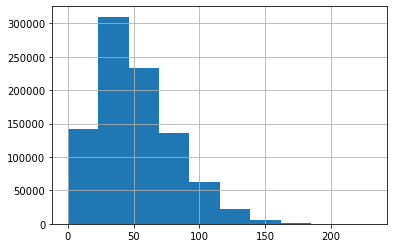

In [67]:
df.sale_amount.hist()

<AxesSubplot:xlabel='sale_amount', ylabel='Count'>

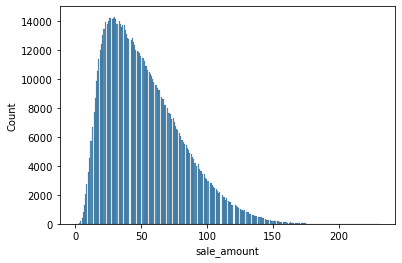

In [68]:
sns.histplot(df.sale_amount)

<AxesSubplot:>

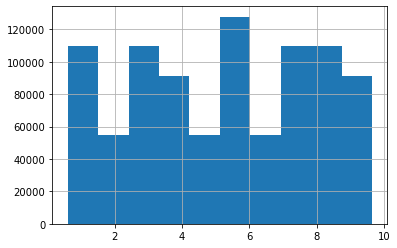

In [14]:
 df.item_price.hist()

## 3. index to date time

In [15]:
df = df.set_index('sale_date').sort_index()

In [16]:
df.head(5)

,item_id,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14
sale_date,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-01,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211
2013-01-01,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664
2013-01-01,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,TX,78232,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211
2013-01-01,12,35.0,215469,9,735 SW Military Dr,San Antonio,TX,78221,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211


## 4. add month and day of week column

In [17]:
df['month'] = df.index.strftime('%m-%b')

In [18]:
df['day_week'] = df.index.strftime('%w-%a')
df.head(3)

,item_id,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14,month,day_week
sale_date,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,01-Jan,2-Tue
2013-01-01,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,01-Jan,2-Tue
2013-01-01,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,01-Jan,2-Tue


## 5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [19]:
df['sales_total'] = df.sale_amount * df.item_price

## 6. Make function(al)

In [23]:
def prep_store_data(df):
    df.sale_date = df.sale_date.apply(lambda date: date[:-13])
    df.sale_date = pd.to_datetime(df.sale_date, format='%a, %d %b %Y')
    df = df.set_index('sale_date').sort_index()
    df = df.rename(columns={'sale_amount': 'quantity'})
    df['month'] = df.index.strftime('%m-%b')
    df['dow'] = df.index.strftime('%w-%a')
    df['sales_total'] = df.quantity * df.item_price
    return df

In [24]:
df = prep_store_data(df)
df.head()

,item_id,quantity,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14,month,dow,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,01-Jan,2-Tue,10.92
2013-01-01,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,01-Jan,2-Tue,218.40
2013-01-01,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,01-Jan,2-Tue,125.55
2013-01-01,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,TX,78232,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,01-Jan,2-Tue,453.60
2013-01-01,12,35.0,215469,9,735 SW Military Dr,San Antonio,TX,78221,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,01-Jan,2-Tue,294.00


# OPS

1. Convert date column to datetime format.


2. Plot the distribution of each of your variables.


3. Set the index to be the datetime variable.


4. Add a month and a year column to your dataframe.


5. Fill any missing values.


6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [69]:
opsd = aq.get_opsd_data()
opsd.head(5)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [70]:
opsd.columns = [column.replace('+','_').lower() for column in opsd]

In [71]:
opsd.date = pd.to_datetime(opsd.date)

In [72]:
opsd.head(5)

,date,consumption,wind,solar,wind_solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


- Plot the distribution of each of your variables.

<AxesSubplot:>

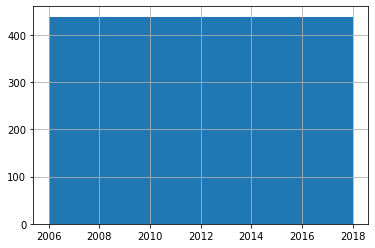

In [73]:
opsd.date.hist() 

<AxesSubplot:>

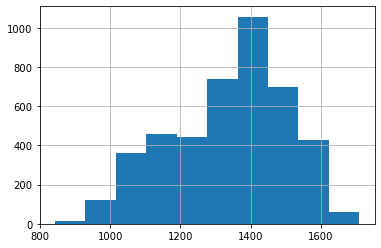

In [74]:
opsd.consumption.hist()

<AxesSubplot:>

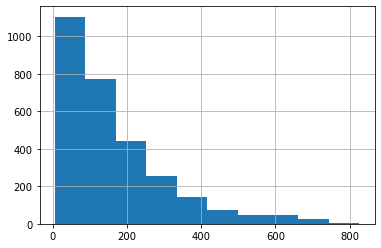

In [75]:
opsd.wind.hist()

<AxesSubplot:>

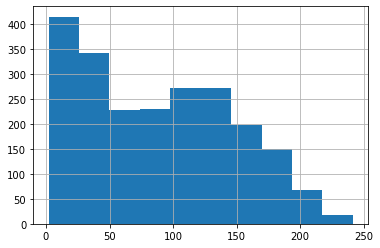

In [76]:
opsd.solar.hist()

<AxesSubplot:>

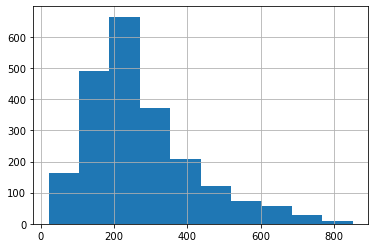

In [77]:
opsd.wind_solar.hist()

- Set the index to be the datetime variable.

In [78]:
opsd.head()

,date,consumption,wind,solar,wind_solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [79]:
opsd.date = pd.to_datetime(opsd.date, format='%a %d %b %Y')

In [80]:
opsd.head()

,date,consumption,wind,solar,wind_solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [81]:
opsd = opsd.set_index('date').sort_index()
opsd.head()

,consumption,wind,solar,wind_solar
date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


## - Add a month and a year column to your dataframe.

In [82]:
opsd['month'] = opsd.index.strftime('%m - %b')
opsd['year'] = opsd.index.strftime('%Y')
opsd.head()

,consumption,wind,solar,wind_solar,month,year
date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,01 - Jan,2006
2006-01-02,1380.521,NaN,NaN,NaN,01 - Jan,2006
2006-01-03,1442.533,NaN,NaN,NaN,01 - Jan,2006
2006-01-04,1457.217,NaN,NaN,NaN,01 - Jan,2006
2006-01-05,1477.131,NaN,NaN,NaN,01 - Jan,2006


## - Fill any missing values.

In [84]:
opsd.shape

(4383, 6)

In [88]:
opsd.isnull().sum()

consumption       0
wind           1463
solar          2195
wind_solar     2196
month             0
year              0
dtype: int64

In [58]:
opsd = opsd.fillna(0)
opsd['wind_solar'] = opsd.wind + opsd.solar

In [59]:
opsd.head()

,consumption,wind,solar,wind_solar,month,year
date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,01 - Jan,2006
2006-01-02,1380.521,0.0,0.0,0.0,01 - Jan,2006
2006-01-03,1442.533,0.0,0.0,0.0,01 - Jan,2006
2006-01-04,1457.217,0.0,0.0,0.0,01 - Jan,2006
2006-01-05,1477.131,0.0,0.0,0.0,01 - Jan,2006


## Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results

In [60]:
def prep_opsd_data(df):
    df.columns = [column.replace('+','_').lower() for column in df]
    df.date = pd.to_datetime(df.date)
    df = df.set_index('date').sort_index()
    df['month'] = df.index.strftime('%m-%b')
    df['year'] = df.index.year
    df = df.fillna(0)
    df['wind_solar'] = df.wind + df.solar
    return df